In [5]:
!pip install gensim
!pip install python-Levenshtein
!pip install spacy

In [6]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.0 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
pip install --upgrade spacy


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade pydantic


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import spacy

In [11]:
!pip install --upgrade scipy gensim


  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)


In [12]:
!pip install cython


In [13]:
!git clone https://github.com/RaRe-Technologies/gensim.git
!cd gensim


fatal: destination path 'gensim' already exists and is not an empty directory.


In [14]:
!python setup.py build_ext --inplace


python: can't open file '/Users/sourasishsaha/Desktop/all projects/projects/setup.py': [Errno 2] No such file or directory


In [15]:
import gensim

In [16]:
df = pd.read_json("Cell_Phones_and_Accessories_5.json", lines=True)

In [17]:
df.shape

(194439, 9)

In [18]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [19]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

# EDA

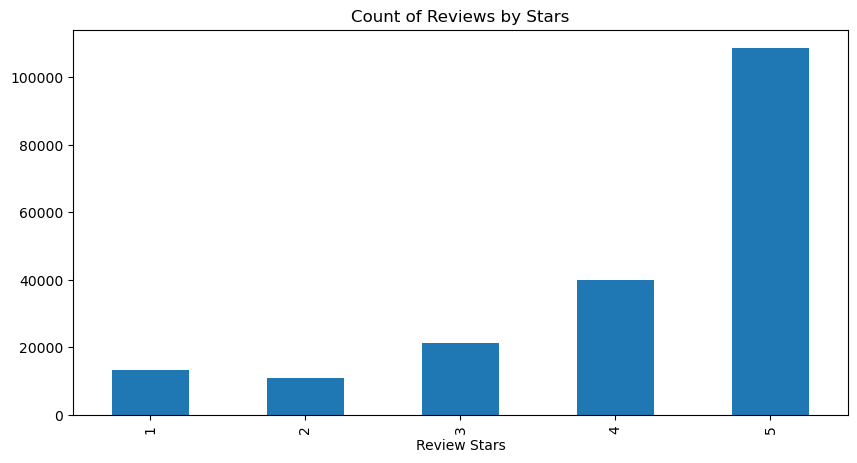

In [21]:
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# pre-processing

## tokenization

In [23]:
# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")


# Function to preprocess a single review
def preprocess_review(text):
    doc = nlp(text)  # Process the text with SpaCy
    # Tokenize and lemmatize, keeping only alphanumeric tokens
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the 'reviewText' column
df["cleaned_reviewText"] = df["reviewText"].apply(preprocess_review)

df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleaned_reviewText
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",they look good and stick good I just do like t...
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",these sticker work like the review say they do...
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",these be awesome and make my phone look so sty...
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",item arrive in great time and be in perfect co...
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",awesome stay on and look great can be use on m...


In [65]:
df.cleaned_reviewText[0]

'they look good and stick good I just do like the rounded shape because I be always bump it and Siri keep pop up and it be irritate I just will buy a product like this again'

In [67]:
to_re_text = df.cleaned_reviewText.apply(gensim.utils.simple_preprocess)


In [69]:
to_re_text

0         [they, look, good, and, stick, good, just, do,...
1         [these, sticker, work, like, the, review, say,...
2         [these, be, awesome, and, make, my, phone, loo...
3         [item, arrive, in, great, time, and, be, in, p...
4         [awesome, stay, on, and, look, great, can, be,...
                                ...                        
194434    [work, great, just, like, my, original, one, r...
194435    [great, product, great, packaging, high, quali...
194436    [this, be, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, work, well, wi...
194438    [product, as, describe, have, waste, lot, of, ...
Name: cleaned_reviewText, Length: 194439, dtype: object

## vectorization

In [73]:

from gensim.models import Word2Vec


# Step 2: Train a Word2Vec model on the tokenized reviews
# Set parameters as needed for the Word2Vec model
model = Word2Vec(sentences=to_re_text, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Obtain the vector representation for each review
def get_review_vector(review_tokens):
    # This function computes the average of the word vectors in the review
    # For reviews that may contain out-of-vocabulary words, it takes the average of available word vectors
    word_vectors = [model.wv[word] for word in review_tokens if word in model.wv]
    if word_vectors:  # If there are any valid word vectors in the review
        return sum(word_vectors) / len(word_vectors)
    else:
        # If no valid word vectors, return a zero vector
        return [0] * model.vector_size

# Step 4: Apply this function to each tokenized review
df["review_vector"] = to_re_text.apply(get_review_vector)

# Display the DataFrame with the vectorized reviews
print(df.head())


       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  \
0                                 Looks Good      1400630400  05 21, 2014   
1                      Really great product.      1389657600  01 14, 2014   
2                      

In [75]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleaned_reviewText,review_vector
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",they look good and stick good I just do like t...,"[-0.04130054, 0.28312424, 0.01825147, -0.43537..."
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",these sticker work like the review say they do...,"[-0.23247935, 0.30654097, 0.09421697, -0.65479..."
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",these be awesome and make my phone look so sty...,"[0.1624107, 0.6608695, -0.31213063, -0.7049551..."
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",item arrive in great time and be in perfect co...,"[0.08011593, 0.46119764, 0.07561409, -0.647420..."
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",awesome stay on and look great can be use on m...,"[-0.30379212, 0.08285837, 0.8115898, -0.465468..."


# model building FFNN

In [86]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical

# # Assuming 'df' contains the 'review_vector' and 'overall_score' columns
# # Convert the review vectors (list) to a numpy array
# X = np.array(df['review_vector'].tolist())  # Input features (review vectors)
# y = df['overall'].values  # Target labels (overall scores)

# # Step 1: Split data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: One-hot encode the labels for multi-class classification (since we have scores 1-5)
# y_train_encoded = to_categorical(y_train - 1, num_classes=5)  # Subtract 1 to make it zero-indexed
# y_test_encoded = to_categorical(y_test - 1, num_classes=5)

# # Step 3: Build the Feedforward Neural Network model with 3 layers
# model = Sequential()

# # Input layer and first hidden layer
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# # Second hidden layer
# model.add(Dense(64, activation='relu'))

# # Third hidden layer
# model.add(Dense(32, activation='relu'))

# # Output layer (softmax for multi-class classification)
# model.add(Dense(5, activation='softmax'))  # 5 classes (1 to 5)

# # Step 4: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# # Step 5: Train the model with early stopping
# model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded))

# # Step 6: Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test_encoded)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# # Optionally, you can predict the overall score for new data
# # predictions = model.predict(X_test)
# # predicted_classes = np.argmax(predictions, axis=1) + 1  # Convert from 0-indexed to 1-5


Epoch 1/500


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 623us/step - accuracy: 0.5947 - loss: 1.0266 - val_accuracy: 0.6114 - val_loss: 0.9689
Epoch 2/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 592us/step - accuracy: 0.6185 - loss: 0.9597 - val_accuracy: 0.6233 - val_loss: 0.9473
Epoch 3/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 596us/step - accuracy: 0.6215 - loss: 0.9500 - val_accuracy: 0.6248 - val_loss: 0.9407
Epoch 4/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 595us/step - accuracy: 0.6252 - loss: 0.9389 - val_accuracy: 0.6243 - val_loss: 0.9383
Epoch 5/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 603us/step - accuracy: 0.6276 - loss: 0.9311 - val_accuracy: 0.6259 - val_loss: 0.9423
Epoch 6/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 594us/step - accuracy: 0.6283 - loss: 0.9273 - val_accuracy: 0.6240 - val_loss: 0.9393
Epoch 7/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - accuracy: 0.6317 - loss: 0.9190 - val_accuracy: 0.6262 - val_loss: 0.9353
Epoch 8/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 603us/step - accuracy: 0.6342 - los

KeyboardInterrupt: 

In [88]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical

# # Assuming 'df' contains 'review_vector' and 'overall_score' columns

# # Step 1: Prepare the data
# X = np.array(df['review_vector'].tolist())  # The tokenized vectors (input)
# y = df['overall'].values  # The sentiment scores (output)

# # Step 2: One-hot encode the labels for multi-class classification (since we have scores 1-5)
# y_encoded = to_categorical(y - 1, num_classes=5)  # Subtract 1 to make it zero-indexed

# # Step 3: Split the data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Step 4: Build the LSTM model
# model = Sequential()

# # Embedding layer (if you want to train word embeddings, otherwise skip this if your vectors are already pre-trained)
# model.add(Embedding(input_dim=10000, output_dim=100, input_length=X_train.shape[1]))  # Adjust input_dim as needed

# # LSTM layer
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# # Dense layer with ReLU activation
# model.add(Dense(64, activation='relu'))

# # Output layer (softmax for multi-class classification)
# model.add(Dense(5, activation='softmax'))  # 5 classes (1 to 5)

# # Step 5: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Step 6: Set up early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5,min_delta=1e-7, restore_best_weights=True)

# # Step 7: Train the model with early stopping
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Step 8: Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# # Optionally, you can predict the overall score for new data
# # predictions = model.predict(X_test)
# # predicted_classes = np.argmax(predictions, axis=1) + 1  # Convert from 0-indexed to 1-5


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 292s 60ms/step - accuracy: 0.5584 - loss: 1.2463 - val_accuracy: 0.5604 - val_loss: 1.2321
Epoch 2/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 298s 61ms/step - accuracy: 0.5582 - loss: 1.2293 - val_accuracy: 0.5604 - val_loss: 1.2140
Epoch 3/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 292s 60ms/step - accuracy: 0.5599 - loss: 1.2148 - val_accuracy: 0.5604 - val_loss: 1.2081
Epoch 4/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 290s 60ms/step - accuracy: 0.5604 - loss: 1.2165 - val_accuracy: 0.5604 - val_loss: 1.2046
Epoch 5/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 310s 64ms/step - accuracy: 0.5595 - loss: 1.2121 - val_accuracy: 0.5605 - val_loss: 1.2099
Epoch 6/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 318s 65ms/step - accuracy: 0.5577 - loss: 1.2116 - val_accuracy: 0.5606 - val_loss: 1.2020
Epoch 7/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 297s 61ms/step - accuracy: 0.5583 - loss: 1.2071 - val_accuracy: 0.5607 - val_loss: 1.2010
Epoch 8/50
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 320s 66ms/step - accuracy: 0.5571 - lo

KeyboardInterrupt: 

# vectorize using google pre trained word2vec

In [92]:
import gensim.downloader as api

In [94]:
wv= api.load('word2vec-google-news-300')

[=-------------------------------------------------] 2.6% 43.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.4% 73.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.7% 111.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.0% 150.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.3% 188.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.6% 226.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.8% 263.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.9% 298.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.1% 333.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.2% 368.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.3% 403.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.6% 442.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.6% 475.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.9% 513.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.1% 550.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.3% 587.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.7% 627.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.7% 660.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.5% 690.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.2% 718.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.9% 747.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.8% 777.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.9% 813.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 50.5% 840.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.3% 869.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.1% 900.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.1% 933.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.5% 973.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.2% 1017.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.3% 1068.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.0% 1080.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.0% 1113.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.9% 1146.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.8% 1193.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.3% 1218.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.7% 1259.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.1% 1298.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.3% 1335.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.4% 1371.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.0% 1412.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.1% 1431.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 88.6% 1472.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.8% 1492.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.9% 1511.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.2% 1549.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.2% 1566.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.3% 1584.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 97.5% 1621.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.6% 1639.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.5% 1654.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [100]:


# Function to get the vector for a given tokenized review
def vectorize_review(tokens, model):
    word_vectors = []
    for token in tokens:
        if token in model.key_to_index:  # Check if the token exists in the Word2Vec model's vocabulary
            word_vectors.append(model[token])
    
    if len(word_vectors) == 0:
        # If no valid word vectors were found, return a zero vector
        return np.zeros(model.vector_size)
    
    # Average the word vectors to get a single vector for the entire review
    review_vector = np.mean(word_vectors, axis=0)
    return review_vector



# Vectorize each tokenized review
df['review_vector2'] = to_re_text.apply(lambda x: vectorize_review(x, wv))

# Display the first few rows with the vectorized reviews
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleaned_reviewText,review_vector,review_vector2
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",they look good and stick good I just do like t...,"[-0.04130054, 0.28312424, 0.01825147, -0.43537...","[0.023010254, 0.053663, 0.039342243, 0.1399943..."
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",these sticker work like the review say they do...,"[-0.23247935, 0.30654097, 0.09421697, -0.65479...","[0.010402135, 0.015897479, 0.02764729, 0.13398..."
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",these be awesome and make my phone look so sty...,"[0.1624107, 0.6608695, -0.31213063, -0.7049551...","[-0.011808268, 0.0005314509, 0.027509563, 0.11..."
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",item arrive in great time and be in perfect co...,"[0.08011593, 0.46119764, 0.07561409, -0.647420...","[0.038256977, 0.042664506, 0.0032164108, 0.104..."
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",awesome stay on and look great can be use on m...,"[-0.30379212, 0.08285837, 0.8115898, -0.465468...","[0.0052693686, 0.005935578, -0.004894438, 0.09..."


In [102]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical

# # Assuming 'df' contains the 'review_vector' and 'overall_score' columns
# # Convert the review vectors (list) to a numpy array
# X = np.array(df['review_vector2'].tolist())  # Input features (review vectors)
# y = df['overall'].values  # Target labels (overall scores)

# # Step 1: Split data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: One-hot encode the labels for multi-class classification (since we have scores 1-5)
# y_train_encoded = to_categorical(y_train - 1, num_classes=5)  # Subtract 1 to make it zero-indexed
# y_test_encoded = to_categorical(y_test - 1, num_classes=5)

# # Step 3: Build the Feedforward Neural Network model with 3 layers
# model = Sequential()

# # Input layer and first hidden layer
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# # Second hidden layer
# model.add(Dense(64, activation='relu'))

# # Third hidden layer
# model.add(Dense(32, activation='relu'))

# # Output layer (softmax for multi-class classification)
# model.add(Dense(5, activation='softmax'))  # 5 classes (1 to 5)

# # Step 4: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# # Step 5: Train the model with early stopping
# model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded))

# # Step 6: Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test_encoded)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# # Optionally, you can predict the overall score for new data
# # predictions = model.predict(X_test)
# # predicted_classes = np.argmax(predictions, axis=1) + 1  # Convert from 0-indexed to 1-5

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 4s 694us/step - accuracy: 0.5860 - loss: 1.0614 - val_accuracy: 0.6077 - val_loss: 0.9804
Epoch 2/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 665us/step - accuracy: 0.6089 - loss: 0.9834 - val_accuracy: 0.6144 - val_loss: 0.9620
Epoch 3/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 660us/step - accuracy: 0.6134 - loss: 0.9728 - val_accuracy: 0.6189 - val_loss: 0.9557
Epoch 4/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 676us/step - accuracy: 0.6163 - loss: 0.9626 - val_accuracy: 0.6170 - val_loss: 0.9590
Epoch 5/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - accuracy: 0.6223 - loss: 0.9517 - val_accuracy: 0.6227 - val_loss: 0.9462
Epoch 6/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - accuracy: 0.6214 - loss: 0.9519 - val_accuracy: 0.6209 - val_loss: 0.9549
Epoch 7/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 667us/step - accuracy: 0.6255 - loss: 0.9420 - val_accuracy: 0.6120 - val_loss: 0.9762
Epoch 8/100
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 679us/step - accuracy: 

KeyboardInterrupt: 

In [104]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.utils import to_categorical

# # Assuming the following columns exist in your DataFrame:
# # 'review_vector' -> A 2D array representing the vectorized review
# # 'overall' -> The target labels (scores: 1, 2, 3, 4, 5)

# # Prepare the data
# X = np.stack(df['review_vector2'].values)  # Stack the vectors into a 2D array
# y = df['overall'].values

# # Normalize the input data (optional, but recommended for LSTMs)
# X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# # Reshape X to add a time step dimension (needed for LSTM)
# X = np.expand_dims(X, axis=1)  # Shape: (samples, time_steps=1, features)

# # Convert y to categorical (one-hot encoding for multi-class classification)
# y = to_categorical(y - 1, num_classes=5)  # Subtract 1 to make it zero-indexed

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Build the stacked LSTM model
# model = Sequential()

# # First LSTM layer
# model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))  # Add dropout to prevent overfitting

# # Second LSTM layer
# model.add(LSTM(64, return_sequences=False))  # Do not return sequences here
# model.add(Dropout(0.2))

# # Dense output layer
# model.add(Dense(5, activation='softmax'))  # 5 classes for the scores

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=10,  # You can adjust this based on your dataset size and performance
#     batch_size=32,  # Adjust batch size if needed
#     verbose=1
# )

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5974 - loss: 1.0252 - val_accuracy: 0.6242 - val_loss: 0.9394
Epoch 2/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6265 - loss: 0.9312 - val_accuracy: 0.6285 - val_loss: 0.9305
Epoch 3/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6387 - loss: 0.9005 - val_accuracy: 0.6282 - val_loss: 0.9325
Epoch 4/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6470 - loss: 0.8777 - val_accuracy: 0.6270 - val_loss: 0.9324
Epoch 5/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6549 - loss: 0.8593 - val_accuracy: 0.6262 - val_loss: 0.9351
Epoch 6/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6620 - loss: 0.8365 - val_accuracy: 0.6233 - val_loss: 0.9446
Epoch 7/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6692 - loss: 0.8201 - val_accuracy: 0.6231 - val_loss: 0.9534
Epoch 8/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6760 - loss: 0.8016 - val

In [ ]:
!pip install torch


In [ ]:
!pip install transformers

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# from sklearn.model_selection import train_test_split
# from torch.utils.data import Dataset, DataLoader
# import torch
# import numpy as np



# # Step 1: Tokenization
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# # Custom dataset for PyTorch
# class ReviewDataset(Dataset):
#     def __init__(self, reviews, labels, tokenizer, max_len=128):
#         self.reviews = reviews
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.reviews)

#     def __getitem__(self, index):
#         review = str(self.reviews[index])
#         label = self.labels[index]

#         # Tokenize the review
#         encoding = self.tokenizer(
#             review,
#             max_length=self.max_len,
#             padding="max_length",
#             truncation=True,
#             return_tensors="pt",
#         )

#         return {
#             "input_ids": encoding["input_ids"].squeeze(0),
#             "attention_mask": encoding["attention_mask"].squeeze(0),
#             "label": torch.tensor(label - 1, dtype=torch.long),  # Make labels zero-indexed
#         }

# # Split data into training and testing sets
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df["reviewText"], df["overall"], test_size=0.2, random_state=42
# )

# # Create datasets
# train_dataset = ReviewDataset(train_texts.tolist(), train_labels.tolist(), tokenizer)
# test_dataset = ReviewDataset(test_texts.tolist(), test_labels.tolist(), tokenizer)

# # Step 2: Load Pre-trained BERT Model
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# # Step 3: Define Training Arguments and Trainer
# training_args = TrainingArguments(
#     output_dir="./results",
#     num_train_epochs=4,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir="./logs",
#     logging_steps=10,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
#     metric_for_best_model="accuracy",
# )

# # Define a custom compute metrics function for classification
# from sklearn.metrics import accuracy_score

# def compute_metrics(pred):
#     labels = pred.label_ids
#     preds = np.argmax(pred.predictions, axis=1)
#     acc = accuracy_score(labels, preds)
#     return {"accuracy": acc}

# # Initialize Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     compute_metrics=compute_metrics,
# )

# # Step 4: Train the Model
# trainer.train()

# # Step 5: Evaluate the Model
# results = trainer.evaluate()
# print(f"Accuracy: {results['eval_accuracy']:.2f}")


In [ ]:
# from transformers import BertTokenizer, TFBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.optimizers import Adam
# import tensorflow as tf
# import numpy as np

# # Tokenization and Data Preparation
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# # Custom Dataset Preparation
# def tokenize_data(reviews, labels, max_len=128):
#     inputs = tokenizer(
#         reviews.tolist(),
#         max_length=max_len,
#         padding="max_length",
#         truncation=True,
#         return_tensors="tf",
#     )
#     inputs["labels"] = tf.convert_to_tensor(np.array(labels) - 1)  # Make labels zero-indexed
#     return inputs

# # Splitting Data
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df["reviewText"], df["overall"], test_size=0.2, random_state=42
# )

# train_inputs = tokenize_data(train_texts, train_labels)
# test_inputs = tokenize_data(test_texts, test_labels)

# # Model Initialization
# model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# # Compile the Model
# optimizer = Adam(learning_rate=3e-5)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# # Train the Model
# history = model.fit(
#     {"input_ids": train_inputs["input_ids"], "attention_mask": train_inputs["attention_mask"]},
#     train_inputs["labels"],
#     validation_data=(
#         {"input_ids": test_inputs["input_ids"], "attention_mask": test_inputs["attention_mask"]},
#         test_inputs["labels"],
#     ),
#     epochs=10,
#     batch_size=32,
# )

# # Evaluate the Model
# results = model.evaluate(
#     {"input_ids": test_inputs["input_ids"], "attention_mask": test_inputs["attention_mask"]},
#     test_inputs["labels"],
# )
# print(f"Test Accuracy: {results[1]:.2f}")


In [ ]:
!pip install tf-keras

In [126]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleaned_reviewText,review_vector,review_vector2
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",they look good and stick good I just do like t...,"[-0.04130054, 0.28312424, 0.01825147, -0.43537...","[0.023010254, 0.053663, 0.039342243, 0.1399943..."
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",these sticker work like the review say they do...,"[-0.23247935, 0.30654097, 0.09421697, -0.65479...","[0.010402135, 0.015897479, 0.02764729, 0.13398..."
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",these be awesome and make my phone look so sty...,"[0.1624107, 0.6608695, -0.31213063, -0.7049551...","[-0.011808268, 0.0005314509, 0.027509563, 0.11..."
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",item arrive in great time and be in perfect co...,"[0.08011593, 0.46119764, 0.07561409, -0.647420...","[0.038256977, 0.042664506, 0.0032164108, 0.104..."
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",awesome stay on and look great can be use on m...,"[-0.30379212, 0.08285837, 0.8115898, -0.465468...","[0.0052693686, 0.005935578, -0.004894438, 0.09..."


In [128]:
# Assign 1 to overall scores of 4 or 5, and 0 to scores of 1, 2, or 3
df["target"] = df["overall"].apply(lambda x: 1 if x in [4, 5] else 0)

# Display the updated DataFrame
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleaned_reviewText,review_vector,review_vector2,target
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",they look good and stick good I just do like t...,"[-0.04130054, 0.28312424, 0.01825147, -0.43537...","[0.023010254, 0.053663, 0.039342243, 0.1399943...",1
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",these sticker work like the review say they do...,"[-0.23247935, 0.30654097, 0.09421697, -0.65479...","[0.010402135, 0.015897479, 0.02764729, 0.13398...",1
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",these be awesome and make my phone look so sty...,"[0.1624107, 0.6608695, -0.31213063, -0.7049551...","[-0.011808268, 0.0005314509, 0.027509563, 0.11...",1
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",item arrive in great time and be in perfect co...,"[0.08011593, 0.46119764, 0.07561409, -0.647420...","[0.038256977, 0.042664506, 0.0032164108, 0.104...",1
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",awesome stay on and look great can be use on m...,"[-0.30379212, 0.08285837, 0.8115898, -0.465468...","[0.0052693686, 0.005935578, -0.004894438, 0.09...",1


In [140]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Convert the 'review_vector2' column to a NumPy array
X = np.array(df["review_vector2"].tolist())  # Convert column of lists into a 2D NumPy array
y = df["target"].values  # Extract the target column as a NumPy array

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Build the FFNN Model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation="relu"),  # Second hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=32,
    verbose=1
)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))



Epoch 1/500


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 4s 716us/step - accuracy: 0.7988 - loss: 0.4368 - val_accuracy: 0.8112 - val_loss: 0.4003
Epoch 2/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 680us/step - accuracy: 0.8231 - loss: 0.3937 - val_accuracy: 0.8152 - val_loss: 0.4061
Epoch 3/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 690us/step - accuracy: 0.8265 - loss: 0.3874 - val_accuracy: 0.8289 - val_loss: 0.3780
Epoch 4/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 683us/step - accuracy: 0.8272 - loss: 0.3834 - val_accuracy: 0.8287 - val_loss: 0.3761
Epoch 5/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - accuracy: 0.8318 - loss: 0.3775 - val_accuracy: 0.8298 - val_loss: 0.3759
Epoch 6/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 680us/step - accuracy: 0.8322 - loss: 0.3754 - val_accuracy: 0.8314 - val_loss: 0.3728
Epoch 7/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - accuracy: 0.8325 - loss: 0.3732 - val_accuracy: 0.8329 - val_loss: 0.3704
Epoch 8/500
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 692us/step - accuracy: 0.8315 - los

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


# Convert the 'review_vector2' column to a 3D NumPy array (required for LSTM input)
X = np.array(df["review_vector2"].tolist())  # Assuming each row is a list of word vectors
y = df["target"].values  # Extract the target column as a NumPy array

X = np.expand_dims(X, axis=1)  # Adds a sequence length of 1
print(X.shape)  # Should now be (num_samples, 1, vector_dim)

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Build the Stacked LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # First LSTM layer
    Dropout(0.3),
    LSTM(64),  # Second LSTM layer
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))




(194439, 1, 300)
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8003 - loss: 0.4385 - val_accuracy: 0.8166 - val_loss: 0.3992
Epoch 2/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8230 - loss: 0.3892 - val_accuracy: 0.8270 - val_loss: 0.3807
Epoch 3/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8274 - loss: 0.3826 - val_accuracy: 0.8252 - val_loss: 0.3816
Epoch 4/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8270 - loss: 0.3816 - val_accuracy: 0.8170 - val_loss: 0.3932
Epoch 5/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8314 - loss: 0.3764 - val_accuracy: 0.8260 - val_loss: 0.3771
Epoch 6/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8295 - loss: 0.3770 - val_accuracy: 0.8275 - val_loss: 0.3785
Epoch 7/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8313 - loss: 0.3738 - val_accuracy: 0.8256 - val_loss: 0.3767
Epoch 8/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8334 - loss: 0.3702 - val

In [149]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Example: Target column
y = df["target"].values

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 2.123531082084662, 1: 0.6539853488231298}


In [167]:
# Convert the 'review_vector2' column to a NumPy array
X = np.array(df["review_vector2"].tolist())  # Convert column of lists into a 2D NumPy array
y = df["target"].values  # Extract the target column as a NumPy array

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Build the FFNN Model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation="relu"),  # Second hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    class_weight={0: 2.0, 1: 1.0}
    
)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4861/4861 ━━━━━━━━━━━━━━━━━━━━ 4s 723us/step - accuracy: 0.7780 - loss: 0.6427 - val_accuracy: 0.7902 - val_loss: 0.4350
Epoch 2/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 4s 729us/step - accuracy: 0.8022 - loss: 0.5736 - val_accuracy: 0.8205 - val_loss: 0.3990
Epoch 3/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 682us/step - accuracy: 0.8072 - loss: 0.5662 - val_accuracy: 0.8194 - val_loss: 0.3898
Epoch 4/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 687us/step - accuracy: 0.8095 - loss: 0.5604 - val_accuracy: 0.8212 - val_loss: 0.3885
Epoch 5/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 687us/step - accuracy: 0.8085 - loss: 0.5583 - val_accuracy: 0.8149 - val_loss: 0.4031
Epoch 6/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 692us/step - accuracy: 0.8127 - loss: 0.5524 - val_accuracy: 0.8275 - val_loss: 0.3802
Epoch 7/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - accuracy: 0.8128 - loss: 0.5475 - val_accuracy: 0.8176 - val_loss: 0.3928
Epoch 8/20
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - accuracy: 0.8132 - loss: 0.54